In [ ]:
# Importando bibliotecas
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


In [ ]:
# Permitir que o usuário faça o upload do arquivo CSV
uploaded = files.upload()

# Obter o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Ler o arquivo CSV carregado
df_atendimento = pd.read_csv(file_name, sep=';', encoding='latin-1')

# Agora você pode executar suas funções com base no DataFrame df_atendimento
# Por exemplo:
def process_data(df):
    # Processamento dos dados aqui
    pass

process_data(df_atendimento)


Saving atendimento_periodo_20240508_162032.csv to atendimento_periodo_20240508_162032.csv


In [ ]:
df_atendimento.head()

,PERÍODO,ATENDIDAS,NÃO ATENDIDAS,TOTAL,I.A.,I.A.C.,SLA PADRÃO (Qtde.),SLA PADRÃO (%),SLA DESEJADO (Qtde.),SLA DESEJADO (%),T.M. ATEND.,T.M. ESPERA,T.M. ABAND.
0,23:00 - 23:59,13,1,14,"92,86%","92,86%",12,"92,31%",12,"92,31%",00:02:40,00:00:48,00:01:05
1,22:00 - 22:59,14,2,16,"87,50%","87,50%",11,"78,57%",11,"78,57%",00:05:29,00:00:41,00:05:02
2,21:00 - 21:59,15,5,20,"75,00%","75,00%",13,"86,67%",13,"86,67%",00:03:12,00:00:53,00:00:10
3,20:00 - 20:59,29,4,33,"87,88%","87,88%",24,"82,76%",24,"82,76%",00:06:13,00:00:55,00:01:15
4,19:00 - 19:59,19,7,26,"73,08%","73,08%",15,"78,95%",15,"78,95%",00:05:05,00:01:15,00:02:02


In [ ]:
print(df_atendimento.columns)

Index(['PERÍODO', 'ATENDIDAS', 'NÃO ATENDIDAS', 'TOTAL', 'I.A.', 'I.A.C.',
       'SLA PADRÃO (Qtde.)', 'SLA PADRÃO (%)', 'SLA DESEJADO (Qtde.)',
       'SLA DESEJADO (%)', '  T.M. ATEND.', 'T.M. ESPERA', 'T.M. ABAND.'],
      dtype='object')


In [ ]:
df_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PERÍODO               24 non-null     object
 1   ATENDIDAS             24 non-null     int64 
 2   NÃO ATENDIDAS         24 non-null     int64 
 3   TOTAL                 24 non-null     int64 
 4   I.A.                  24 non-null     object
 5   I.A.C.                24 non-null     object
 6   SLA PADRÃO (Qtde.)    24 non-null     int64 
 7   SLA PADRÃO (%)        24 non-null     object
 8   SLA DESEJADO (Qtde.)  24 non-null     int64 
 9   SLA DESEJADO (%)      24 non-null     object
 10    T.M. ATEND.         24 non-null     object
 11  T.M. ESPERA           24 non-null     object
 12  T.M. ABAND.           24 non-null     object
dtypes: int64(5), object(8)
memory usage: 2.6+ KB


In [ ]:
df_atendimento.size

312

In [ ]:
df_atendimento.describe()

,ATENDIDAS,NÃO ATENDIDAS,TOTAL,SLA PADRÃO (Qtde.),SLA DESEJADO (Qtde.)
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,34.958333,4.125000,39.083333,30.833333,30.833333
std,32.795120,4.025057,35.717389,29.228733,29.228733
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.500000,1.000000,7.500000,4.500000,4.500000
50%,24.000000,3.500000,29.500000,20.500000,20.500000
75%,57.500000,6.250000,62.500000,49.750000,49.750000
max,121.000000,14.000000,135.000000,108.000000,108.000000


In [ ]:
df_atendimento.isnull().sum()

PERÍODO                 0
ATENDIDAS               0
NÃO ATENDIDAS           0
TOTAL                   0
I.A.                    0
I.A.C.                  0
SLA PADRÃO (Qtde.)      0
SLA PADRÃO (%)          0
SLA DESEJADO (Qtde.)    0
SLA DESEJADO (%)        0
  T.M. ATEND.           0
T.M. ESPERA             0
T.M. ABAND.             0
dtype: int64

In [ ]:
print(df_atendimento.columns)

Index(['PERÍODO', 'ATENDIDAS', 'NÃO ATENDIDAS', 'TOTAL', 'I.A.', 'I.A.C.',
       'SLA PADRÃO (Qtde.)', 'SLA PADRÃO (%)', 'SLA DESEJADO (Qtde.)',
       'SLA DESEJADO (%)', '  T.M. ATEND.', 'T.M. ESPERA', 'T.M. ABAND.'],
      dtype='object')


In [ ]:
# Dropando colunas
columns_to_drop = ['SLA PADRÃO (%)', 'SLA DESEJADO (%)']
df_clean = df_atendimento.drop(columns=columns_to_drop)

In [ ]:
# Verificando quantidade de ligações atendidas
atendidas = df_clean['ATENDIDAS'].sum()
atendidas

839

In [ ]:
atendimento_total = df_clean['ATENDIDAS'].sum() + df_clean['NÃO ATENDIDAS'].sum()
atendimento_total

938

In [ ]:
sla_minimo = math.trunc((atendimento_total / 100) * 15)
print(sla_minimo)

140


In [ ]:
objetivo_atendimento = atendimento_total - sla_minimo
print(objetivo_atendimento)

798


In [ ]:
# Verificando quantidade de ligações não atendidas
nao_atendidas = df_clean['NÃO ATENDIDAS'].sum()
nao_atendidas

99

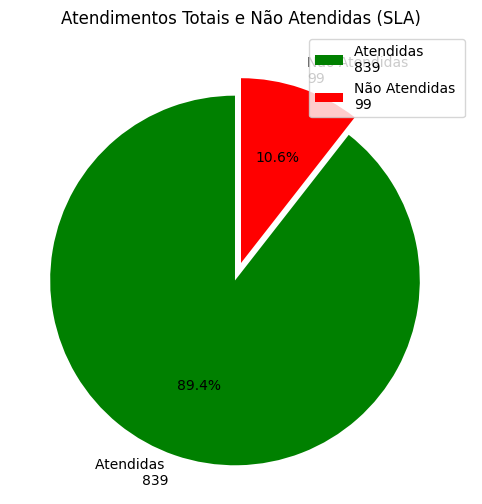

In [ ]:
# Configurando o gráfico
sizes = [atendidas, nao_atendidas]
labels = [f'Atendidas \n{atendidas}', f'Não Atendidas \n{nao_atendidas}']
cores = ['green', 'red']
explode = [0.1, 0]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%.1f%%',explode = explode, startangle=90,  colors=cores)

# Adicionando título
plt.title('Atendimentos Totais e Não Atendidas (SLA)')

# Adicionando legenda
plt.legend(loc="upper right", labels=labels)

plt.show()


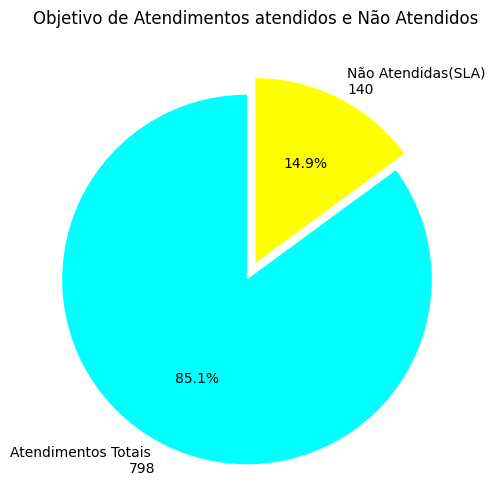

In [ ]:
# Configurando o gráfico
sizes = [objetivo_atendimento, sla_minimo]
labels = [f'Atendimentos Totais \n{objetivo_atendimento}', f'Não Atendidas(SLA) \n{sla_minimo}']
cores = ['cyan', 'yellow']
explode = [0.1, 0]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', explode=explode, startangle=90, colors=cores)

# Adicionando título
plt.title('Objetivo de Atendimentos atendidos e Não Atendidos')

# Adicionando legenda
#plt.legend(loc="upper right", labels=labels)

plt.show()

In [ ]:
df_clean.head()

,PERÍODO,ATENDIDAS,NÃO ATENDIDAS,TOTAL,I.A.,I.A.C.,SLA PADRÃO (Qtde.),SLA DESEJADO (Qtde.),T.M. ATEND.,T.M. ESPERA,T.M. ABAND.
0,23:00 - 23:59,13,1,14,"92,86%","92,86%",12,12,00:02:40,00:00:48,00:01:05
1,22:00 - 22:59,14,2,16,"87,50%","87,50%",11,11,00:05:29,00:00:41,00:05:02
2,21:00 - 21:59,15,5,20,"75,00%","75,00%",13,13,00:03:12,00:00:53,00:00:10
3,20:00 - 20:59,29,4,33,"87,88%","87,88%",24,24,00:06:13,00:00:55,00:01:15
4,19:00 - 19:59,19,7,26,"73,08%","73,08%",15,15,00:05:05,00:01:15,00:02:02


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PERÍODO               24 non-null     object
 1   ATENDIDAS             24 non-null     int64 
 2   NÃO ATENDIDAS         24 non-null     int64 
 3   TOTAL                 24 non-null     int64 
 4   I.A.                  24 non-null     object
 5   I.A.C.                24 non-null     object
 6   SLA PADRÃO (Qtde.)    24 non-null     int64 
 7   SLA DESEJADO (Qtde.)  24 non-null     int64 
 8     T.M. ATEND.         24 non-null     object
 9   T.M. ESPERA           24 non-null     object
 10  T.M. ABAND.           24 non-null     object
dtypes: int64(5), object(6)
memory usage: 2.2+ KB


In [ ]:

# Suponha que seu DataFrame seja chamado 'df'
df_clean['I.A.'] = df_clean['I.A.'].str.replace('%', '').str.replace(',', '.').astype(float)


In [ ]:
media_ia = df_clean['I.A.'].mean()
print(f'Média dos valores da coluna I.A.: {media_ia:.2f}')


Média dos valores da coluna I.A.: 84.71


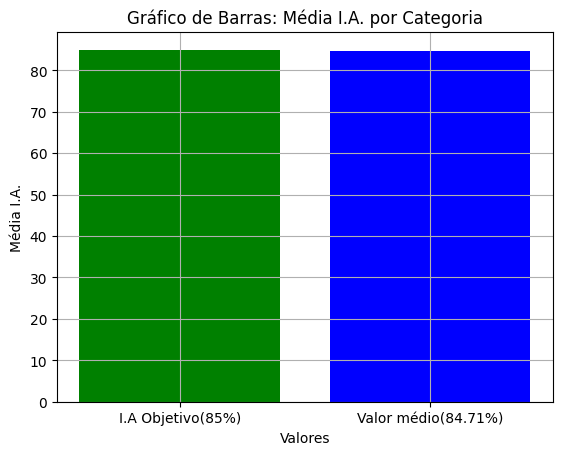

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(["I.A Objetivo(85%)", f"Valor médio({media_ia:.2f}%)"])
y = np.array([85, media_ia])

plt.bar(x, y, color=['green', 'blue'])
plt.xlabel('Valores')
plt.ylabel('Média I.A.')
plt.grid(True)
plt.title('Gráfico de Barras: Média I.A. por Categoria')
plt.show()


In [ ]:
# prompt: calcule a diferença do media_ia para 100

diferenca = 100 - media_ia
print(f'Diferença entre a média I.A. e 100: {diferenca:.2f}%')


Diferença entre a média I.A. e 100: 15.29%


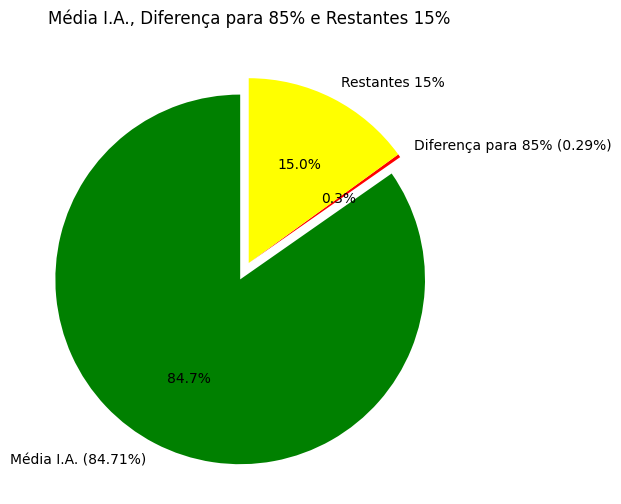

In [ ]:
# Cálculo dos valores
media_ia = df_clean['I.A.'].mean()
diferenca_85 = 85 - media_ia
restantes_15 = 15

labels = [f'Média I.A. ({media_ia:.2f}%)', f'Diferença para 85% ({diferenca_85:.2f}%)', 'Restantes 15%']
sizes = [media_ia, diferenca_85, restantes_15]
colors = ['green', 'red', 'yellow']
explode = [0.1, 0, 0]

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', explode=explode, startangle=90, colors=colors)

# Adicionando título
plt.title('Média I.A., Diferença para 85% e Restantes 15%')

# Exibição do gráfico
plt.show()


In [ ]:
df_clean.head()

,PERÍODO,ATENDIDAS,NÃO ATENDIDAS,TOTAL,I.A.,I.A.C.,SLA PADRÃO (Qtde.),SLA DESEJADO (Qtde.),T.M. ATEND.,T.M. ESPERA,T.M. ABAND.
0,23:00 - 23:59,13,1,14,92.86,"92,86%",12,12,00:02:40,00:00:48,00:01:05
1,22:00 - 22:59,14,2,16,87.50,"87,50%",11,11,00:05:29,00:00:41,00:05:02
2,21:00 - 21:59,15,5,20,75.00,"75,00%",13,13,00:03:12,00:00:53,00:00:10
3,20:00 - 20:59,29,4,33,87.88,"87,88%",24,24,00:06:13,00:00:55,00:01:15
4,19:00 - 19:59,19,7,26,73.08,"73,08%",15,15,00:05:05,00:01:15,00:02:02


In [ ]:
df_clean.rename(columns={'  T.M. ATEND.': 'tempo_medio_atend'}, inplace=True)
df_clean.rename(columns={'T.M. ABAND.': 'tempo_medio_abandono'}, inplace=True)
df_clean.rename(columns={'T.M. ESPERA': 'tempo_medio_espera'}, inplace=True)

In [ ]:
def convert_time_to_seconds(time_str):
  hours, minutes, seconds = map(int, time_str.split(':'))
  return hours * 3600 + minutes * 60 + seconds

In [ ]:
atendimento = df_clean['tempo_medio_atend'].apply(convert_time_to_seconds)
espera_segundos = atendimento.mean()

tm_atendimento = str(datetime.timedelta(seconds=int(espera_segundos)))

print(f"Média do tempo médio de atendimento: {tm_atendimento}")


Média do tempo médio de atendimento: 0:04:42


In [ ]:
espera = df_clean['tempo_medio_espera'].apply(convert_time_to_seconds)
espera_segundos = espera.mean()

tm_espera = str(datetime.timedelta(seconds=int(espera_segundos)))

print(f"Média do tempo médio de espera: {tm_espera}")

Média do tempo médio de espera: 0:00:36


In [ ]:
print(df_clean.columns)

Index(['PERÍODO', 'ATENDIDAS', 'NÃO ATENDIDAS', 'TOTAL', 'I.A.', 'I.A.C.',
       'SLA PADRÃO (Qtde.)', 'SLA DESEJADO (Qtde.)', 'tempo_medio_atend',
       'tempo_medio_espera', 'tempo_medio_abandono'],
      dtype='object')


In [ ]:
abandono = df_clean['tempo_medio_abandono'].apply(convert_time_to_seconds)
abandono_segundos = abandono.mean()

tm_abandono = str(datetime.timedelta(seconds=int(abandono_segundos)))

print(f"Média do tempo médio de abadono: {tm_abandono}")

Média do tempo médio de abadono: 0:01:35


In [ ]:
print("=== ATENDIMENTO === \n")
print("Recomendável: 0:06:00\nDesejável:    0:05:30")
print("-"*22)
print(f"Média:        {tm_atendimento} \n\n")

print("=== ESPERA === \n")
print("Recomendável: 0:01:00\nDesejável:    0:00:00")
print("-"*22)
print(f"Média:        {tm_espera} \n\n")

print("=== ABANDONO === \n")
print("Recomendável: 0:01:00\nDesejável:    0:00:00")
print("-"*22)
print(f"Média:        {tm_abandono} \n\n")

=== ATENDIMENTO === 

Recomendável: 0:06:00
Desejável:    0:05:30
----------------------
Média:        0:04:42 


=== ESPERA === 

Recomendável: 0:01:00
Desejável:    0:00:00
----------------------
Média:        0:00:36 


=== ABANDONO === 

Recomendável: 0:01:00
Desejável:    0:00:00
----------------------
Média:        0:01:35 




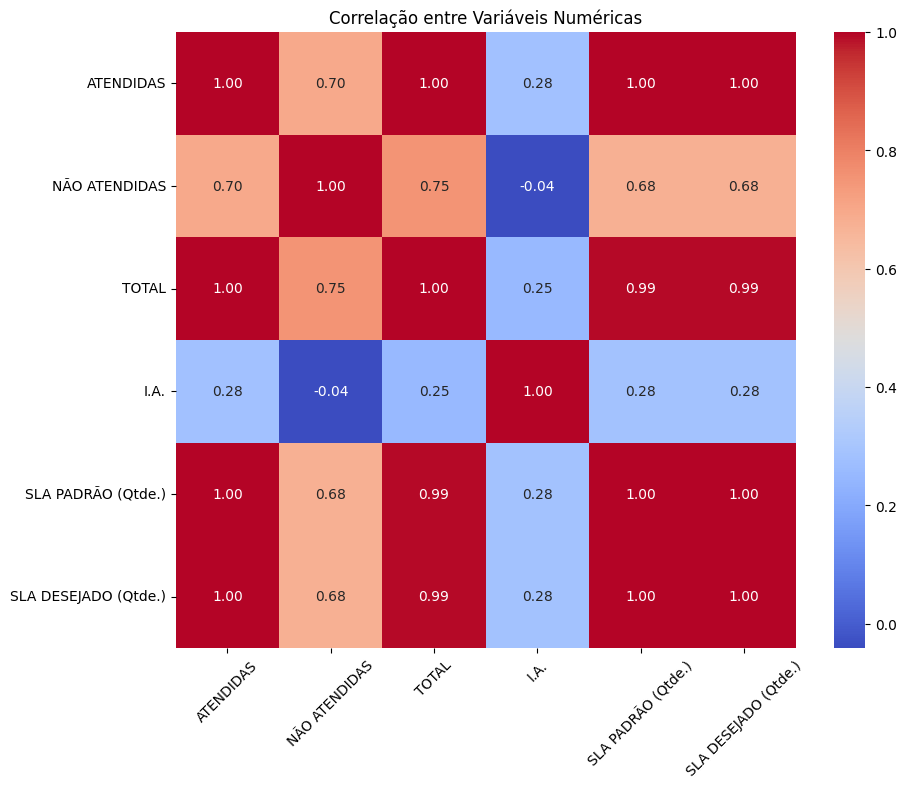

In [ ]:
# prompt: crie a correlação dos dados numericos e gere um grafico disso

# Selecionando apenas as colunas numéricas
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = df_numeric.corr()

# Gerando o gráfico de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERÍODO               24 non-null     object 
 1   ATENDIDAS             24 non-null     int64  
 2   NÃO ATENDIDAS         24 non-null     int64  
 3   TOTAL                 24 non-null     int64  
 4   I.A.                  24 non-null     float64
 5   I.A.C.                24 non-null     object 
 6   SLA PADRÃO (Qtde.)    24 non-null     int64  
 7   SLA DESEJADO (Qtde.)  24 non-null     int64  
 8   tempo_medio_atend     24 non-null     object 
 9   tempo_medio_espera    24 non-null     object 
 10  tempo_medio_abandono  24 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ KB


<ipython-input-73-c2b23da66594>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_atendimento['PERÍODO'][::-1])


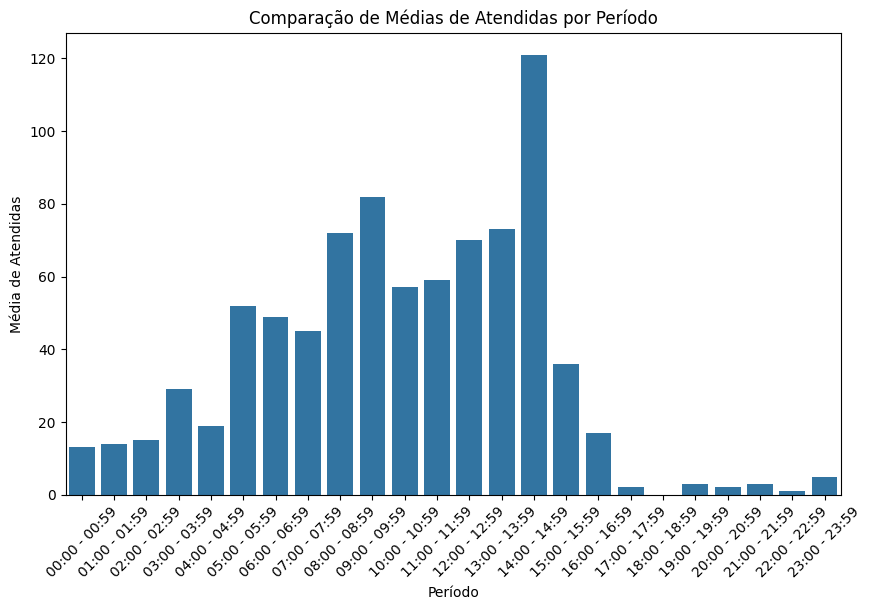

In [ ]:
# Gráfico de barras para comparar médias entre grupos
plt.figure(figsize=(10, 6))
sns.barplot(x='PERÍODO', y='ATENDIDAS', data=df_atendimento)
plt.xlabel('Período')
plt.ylabel('Média de Atendidas')
plt.title('Comparação de Médias de Atendidas por Período')
plt.xticks(rotation=45)

plt.gca().set_xticklabels(df_atendimento['PERÍODO'][::-1])

plt.show()

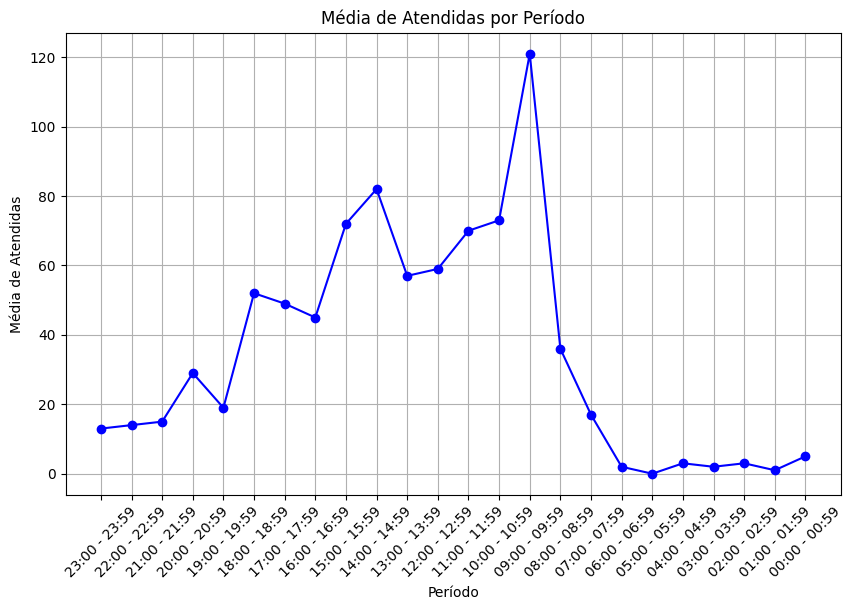

In [ ]:
# Criando um gráfico com uma linha passando pelos valores
plt.figure(figsize=(10, 6))
plt.plot(df_atendimento['PERÍODO'], df_atendimento['ATENDIDAS'], marker='o', color='b')
plt.xlabel('Período')
plt.ylabel('Média de Atendidas')
plt.title('Média de Atendidas por Período')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adiciona o grid ao gráfico
plt.show()

<ipython-input-75-437d3911c266>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_atendimento['PERÍODO'][::-1])


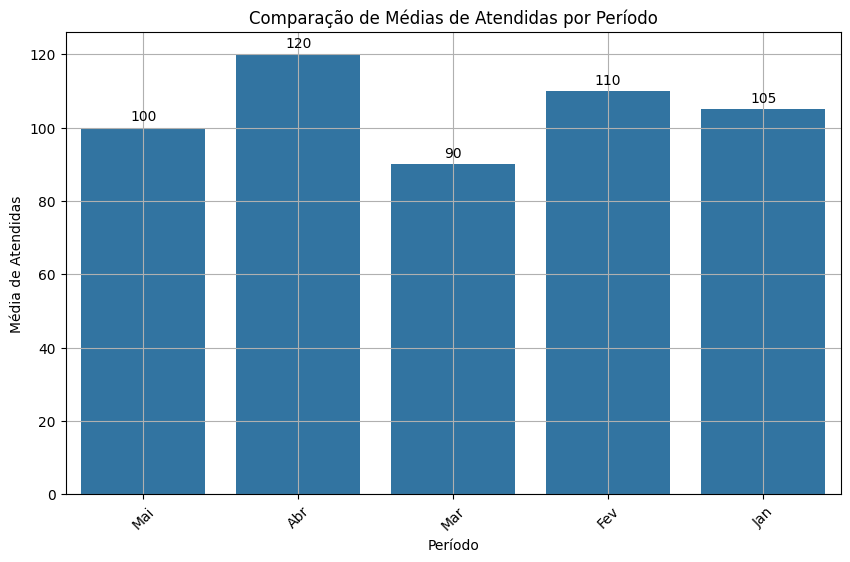

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de DataFrame
data = {
    'PERÍODO': ['Jan', 'Fev', 'Mar', 'Abr', 'Mai'],
    'ATENDIDAS': [100, 120, 90, 110, 105]
}
df_atendimento = pd.DataFrame(data)

# Gráfico de barras para comparar médias entre grupos
plt.figure(figsize=(10, 6))
sns.barplot(x='PERÍODO', y='ATENDIDAS', data=df_atendimento)
plt.xlabel('Período')
plt.ylabel('Média de Atendidas')
plt.title('Comparação de Médias de Atendidas por Período')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adiciona o grid ao gráfico

# Inverter a ordem dos rótulos
plt.gca().set_xticklabels(df_atendimento['PERÍODO'][::-1])

# Exibir valores acima das barras
for index, value in enumerate(df_atendimento['ATENDIDAS']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


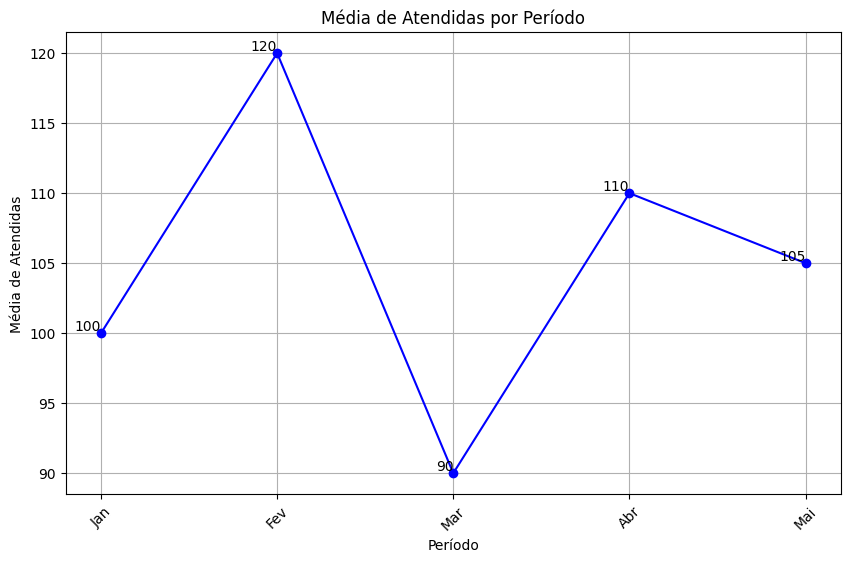

In [ ]:
# Criando um gráfico com uma linha passando pelos valores
plt.figure(figsize=(10, 6))
plt.plot(df_atendimento['PERÍODO'], df_atendimento['ATENDIDAS'], marker='o', color='b')
plt.xlabel('Período')
plt.ylabel('Média de Atendidas')
plt.title('Média de Atendidas por Período')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adiciona o grid ao gráfico

# Exibir os valores
for x, y in zip(df_atendimento['PERÍODO'], df_atendimento['ATENDIDAS']):
    plt.text(x, y, f'{y}', ha='right', va='bottom')

plt.show()